## EXERCISES_RLAB02

#### REZA RAJAEE (2040483)

## Exercise 1
#### • a set of measurements have been performed on the concentration of a contaminant in tap water. The following tables reports a set of values (x), with the corresponding probabilities given by the two methods ( $p_1$ and  $p_2$)
| x | 15.58 | 15.9 | 16 | 16.1 | 16.2 |
| --- | --- | --- | --- | --- | --- |
| p1 | 0.15 | 0.21 |0.35 | 0.15 | 0.14 |
| p2 | 0.14 | 0.05 |0.64 | 0.08 | 0.09 |

#### • Evaluate the expected values, E[X], and the variance, Var(X), for both methods

In [158]:
x <- c(15.58, 15.9, 16, 16.1,16.2)
p1 <- c(.15,.21,.35,.15,.14)
p2 <- c(.14,.05,.64,.08,.09)

Expect <- function(x,p){    
    Expect <- sum(x*p)
    return(Expect)
}

Variance <- function(x,p){
    Variance <- (Expect(x**2,p)-(Expect(x,p)**2)) # using Expect function for Variance
    return(Variance)    
}

cat("P1: The expected values, E[X] is:", Expect(x,p1),", and the variance, Var(X) is: ",Variance(x,p1),".\n\n")
cat("P2: The expected values, E[X] is:", Expect(x,p2),", and the variance, Var(X) is: ",Variance(x,p2),".\n\n")

P1: The expected values, E[X] is: 15.959 , and the variance, Var(X) is:  0.033979 .

P2: The expected values, E[X] is: 15.9622 , and the variance, Var(X) is:  0.02816716 .



## Exercise 2
#### • the waiting time, in minutes, at the doctor’s is about 30 minutes, and the distribution follows an exponential pdf with rate 1/30
#### A) simulate the waiting time for 50 people at the doctor’s office and plot the relative histogram

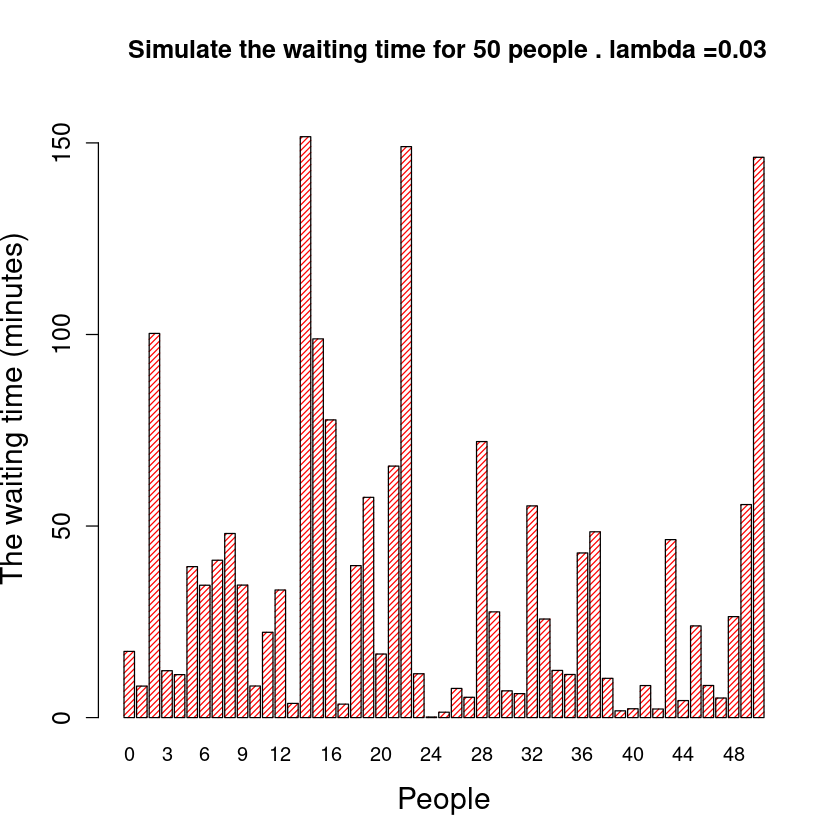

In [14]:
lambda <- 1/30 ## unite is minutes so we must change evry time in this exercise to minutes.
x <- 0:50 
random_exp <- rexp(x, lambda )

barplot (random_exp , names=x, col='red', xlab='People', ylab='The waiting time (minutes)',
density =30,
main = sprintf (" Simulate the waiting time for 50 people . lambda =%.2f",lambda ),
ylim=c(0,max(random_exp)+10), ## finding max of simulated data for beter labeling
cex.lab=1.5, cex.axis=1.25, cex.main=1.25, cex.sub=1.5)

#### B) what is the probability that a person will wait for less than 10 minutes ?

In [16]:
cat('The probability that a person will wait for less than 10 minutes is: ',pexp(10, lambda ))

The probability that a person will wait for less than 10 minutes is:  0.2834687

#### C) evaluate the average waiting time from the simulated data and compare it with the expected value (calculated from theory and by manipulating the probability distributions using R)

In [17]:
cat('The average waiting time from the simulated data (50) is: ',mean(random_exp),'\n\n')

x_2 <- 0:50000 
random_exp_2 <- rexp(x_2, lambda )
cat('The average waiting time from the simulated data (50000) is: ',mean(random_exp_2))

The average waiting time from the simulated data (50) is:  34.32991 

The average waiting time from the simulated data (50000) is:  30.01384

### The expected value from theory is 30 minutes. The mean value (expected value) from the simulated data is less than 30 (or more than 30 for different random data), but it is close to it. If we have more data the mean value will be closer to the 30.

#### D) what is the probability for waiting more than one hour before being received ?

In [18]:
cat('The probability for waiting more than one hour before being received is: ',1-pexp(60, lambda ))

The probability for waiting more than one hour before being received is:  0.1353353

## Exercise 3
#### • let’s suppose that on a book, on average, there is one typo error every three pages. If the number of errors follows a Poisson distribution, plot the pdf and cdf, and calculate the probability that there is at least one error on a specific page of the book

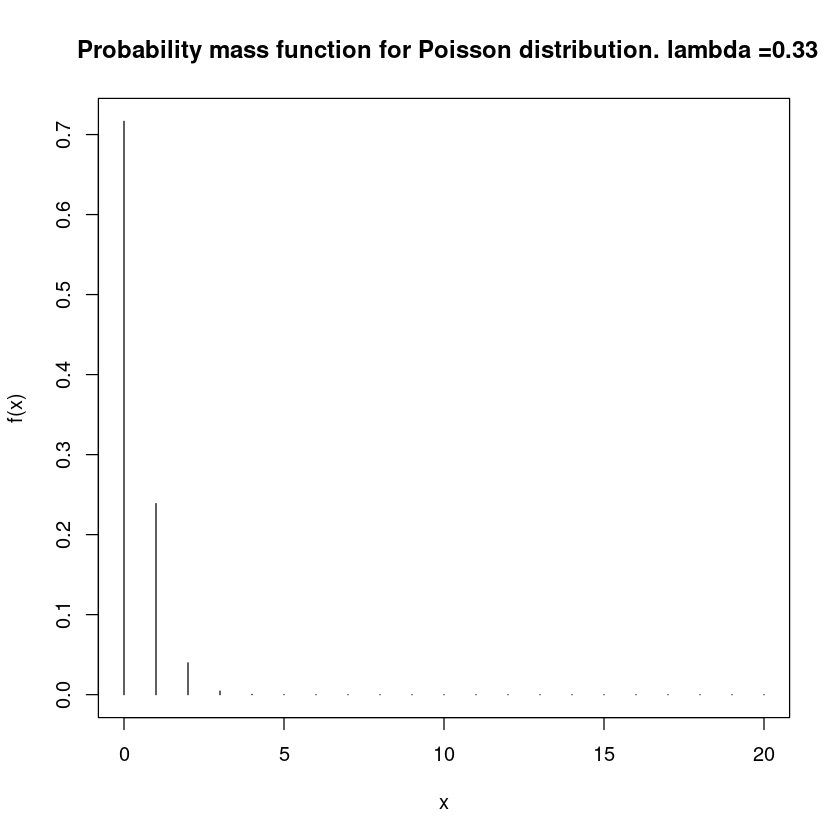

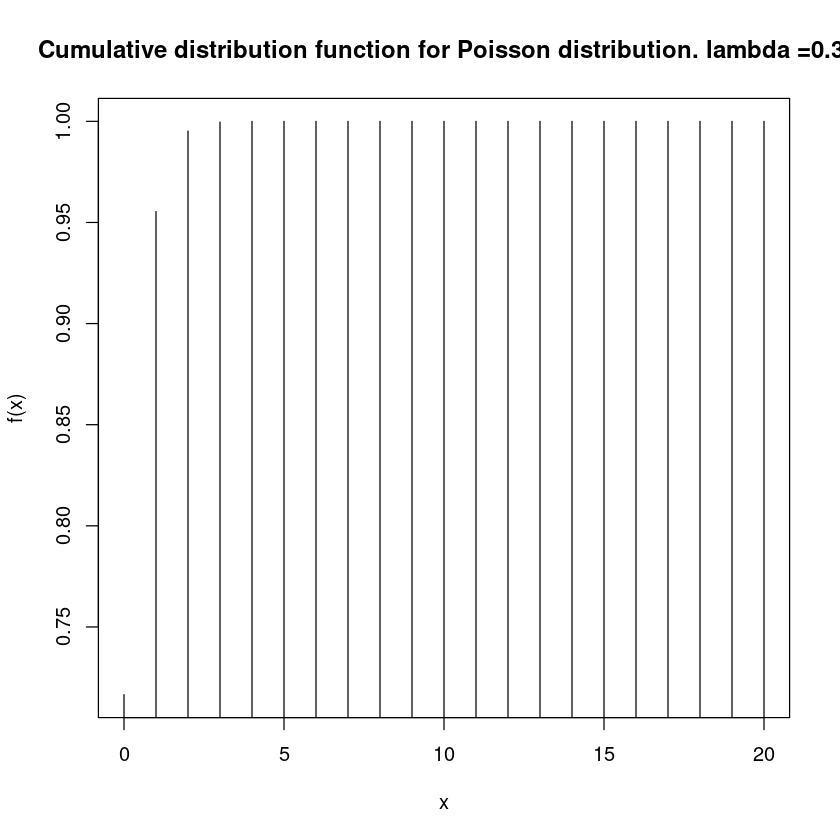

In [74]:
lambda_p <- 1/3
x <- 0:20

p_pdf <- dpois(x,lambda_p)
p_cdf <- ppois(x,lambda_p)



plot(x,p_pdf,typ='h', ylab='f(x)',
    main = sprintf (" Probability mass function for Poisson distribution. lambda =%.2f",lambda_p ))

plot(x, p_cdf,typ='h', ylab='f(x)',
    main = sprintf (" Cumulative distribution function for Poisson distribution. lambda =%.2f",lambda_p ))

In [67]:
cat('The probability that there is at least one error on a specific page of the book is:',
    1-dpois(0,lambda_p)) ## p>=1

The probability that there is at least one error on a specific page of the book is: 0.2834687

## Exercise 4
#### • we randomly draw cards from a deck of 52 cards, with replacement, until one ace is drawn. Calculate the probability that at least 10 draws are needed.

In [75]:
## this exercise follow the geometric distribution

cat('The probability that at least 10 draws are needed is (theory): ',
    1-pgeom(9, 4/52))## at least 10 draws are needed means after 9 draws we have ace

The probability that at least 10 draws are needed is (theory):  0.4491371

In [104]:
cards <- function(s,n){ 
## s is size of our expriment, n is number of draws that we want to have one ace after that
    sucsees <- 0
    for(i in 1:s){
        rn <- floor(runif(n,1,52)) 
## use uniform distribution becuase any card has same probability (1/52) to draw
        if(1 %in% rn || 14 %in% rn || 27 %in% rn || 40 %in% rn){  
## There are 4 kinds in cards that each one has 13 cards so in simulation 1,14,27,40 are our aces
            sucsees <- sucsees+1 
            }
        }
    prob <- sucsees/s
    return(prob) 
## return the probability that we have ace befor (n+1) draws
}

cat('The probability that at least 10 draws are needed is (simulation): ',1-cards(100,9))

The probability that at least 10 draws are needed is (simulation):  0.46

### Result from simulation is close to the result from theory. As always if we increase the time of expriment we will have closer result.

## Exercise 5
#### • the time it takes a student to complete a TOLC-I University orientation and evaluation test follows a density function of the form
$$
 F(x)=\begin{cases}
c (t-1) (2-t) & 1<t<2 \\
0 & \text{otherwise}
\end{cases}
$$
#### where t is the time in hours.
#### a) using the integrate() R function, determine the constant c (and verify it analytically)

In [31]:
options(warn=-1)

In [117]:
## Integral of the density function must be 1  in whole space of events and we use it to determine the c. 
## So c is the 1 over the integral of density function without c.

t <- function(t){(t-1)*(2-t)}  ## define function without c

c <- 1/(integrate(t, 1, 2)$value) ## calculate integral

cat('c is: ',c)

c is:  6

#### b) write the set of four R functions and plot the pdf and cdf, respectively

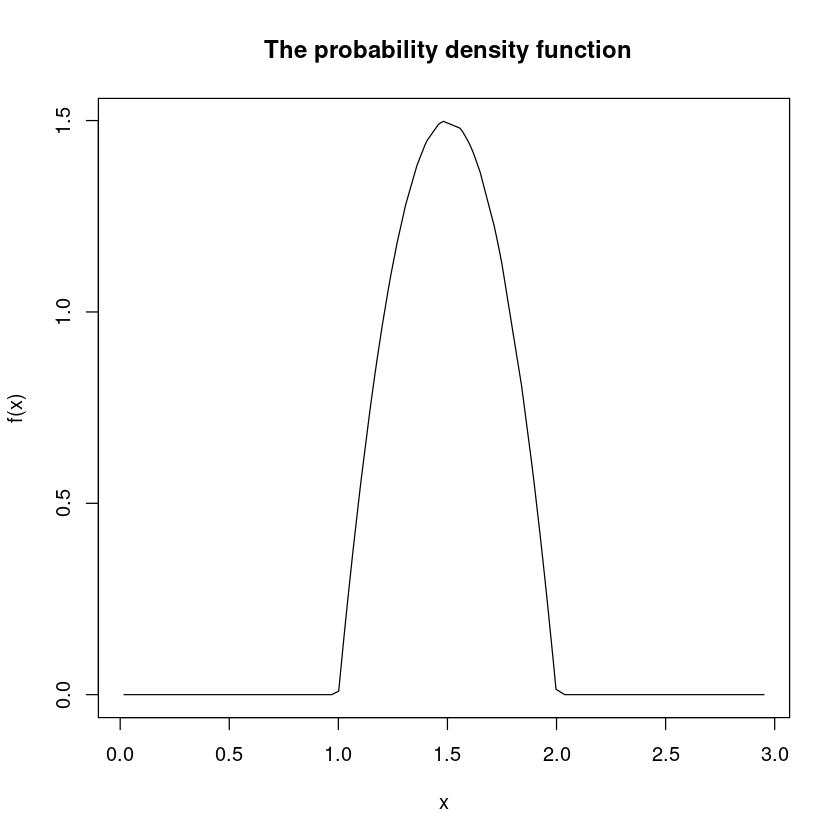

In [28]:
## The probability density function (PDF)

pdf <- function(t){
    if(t>1 & t<2){
        p <- 6*(t-1)*(2-t)
    } 
    if(t<=1 || t>=2) {
        p <- 0
    }
    return(p)
}

x<-sort(runif(150,0,3)) ## rnage x 

y<-c()
for (i in 1:150){
    y[i] <- pdf(x[i]) ## f(x) of our x range
}

plot(x,y, type='l',ylab='f(x)',
    main = sprintf (" The probability density function"))

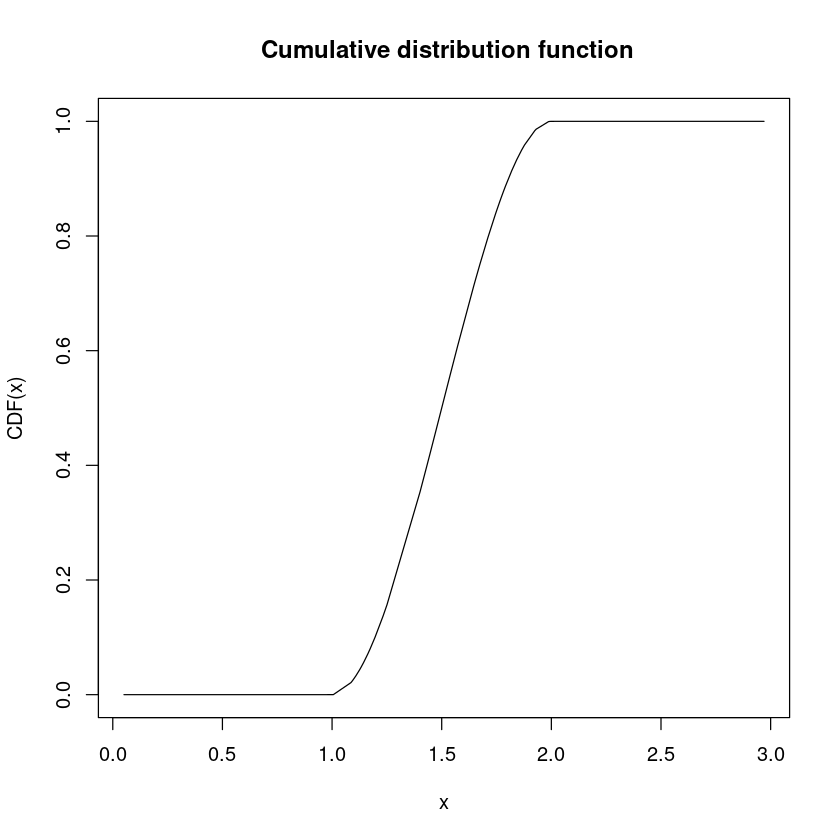

In [32]:
## The Cumulative Distribution Function (CDF) 

cdf <- function(t){
    if (t<=1){
        cu <-0
    }
    if (t>1 & t<2){
        cu <-integrate(pdf,1,t)$value  
    }
    if (t>=2){
        cu <-1
    }
    return(cu)
}

x<-sort(runif(150,0,3)) ## range x

y<-c()
for (i in 1:150){
    y[i] <- cdf(x[i])  ## cdf of our x range
}

plot(x,y, type='l',ylab='CDF(x)',
    main = sprintf (" Cumulative distribution function"))

In [34]:
## The Quantile Function (the inverse CDF) (finding nmuber with especial probability)

library('GoFKernel') ## for using inverse

qf <- function(p){
    i_cdf <- inverse(cdf, lower = 1, upper = 2) ## CDF  is monotone increasing functions in the interval [1,2]
   return(i_cdf(p))
}

qf(.5)

[1] 1.5

In [137]:
## The Function to Generate Random variable having F(x) distribution

rf <- function(n){
    num <- c()
    p <- runif(n,0,1) ## generate random number between [0,1] (probability)
    for (i in 1:n){
         num[i] <- qf(p[i])  ## using qf functiom (inverse of CDF) to find the number 
    }
   return (num)    
}

rf(10)

[1] 1.473817 1.825382 1.987595 1.823365 1.472840 1.821199 1.374841 1.502691
 [9] 1.289744 1.827341

#### c) evaluate the probability that the student will finish the aptitude test in more than 75 minutes. And that it will take 90 and 120 minutes.

In [124]:
cat('The probability that the student will finish the aptitude test in more than 75 minutes is: ',
    1-cdf(75/60),'\n\n') 

cat('The probability that the student will finish the aptitude test between 90 and 120 minutes is: ',
    cdf(120/60)-cdf(90/60)) 

The probability that the student will finish the aptitude test in more than 75 minutes is:  0.84375 

The probability that the student will finish the aptitude test between 90 and 120 minutes is:  0.5

## Exercise 6
#### • the lifetime of tires sold by an used tires shop is $10^4· x$ km, where $x$ is a random variable following the distribution funcion
$$
 F(x)=\begin{cases}
\frac{2}{x^2} & 1<x<2 \\
0 & \text{otherwise}
\end{cases}
$$
#### a) write the set of four R functions and plot the pdf and cdf, respectively

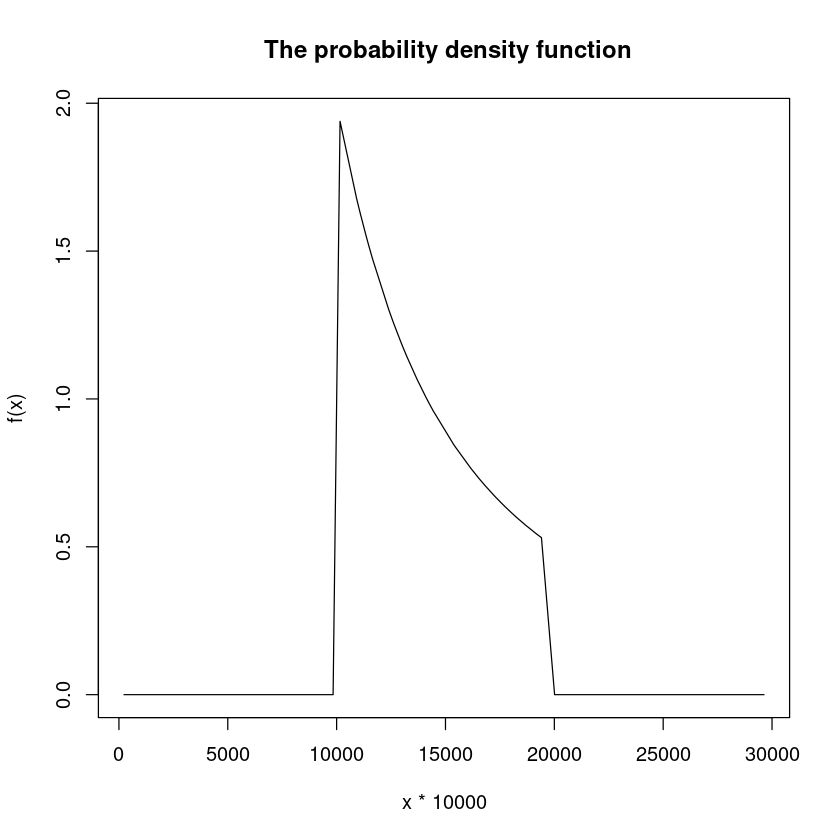

In [130]:
## The probability density function (PDF)

pdf_x <- function(x){
    if(x>1 & x<2){
        p <- 2/(x**2)
    } 
    if(x<=1 || x>=2) {
        p <- 0
    }
    return(p)
}

x<-sort(runif(150,0,3)) ## range x
 
y<-c()
for (i in 1:150){
    y[i] <- pdf_x(x[i]) ## f(x) of our x range
}

plot(x*10000,y, type='l',ylab='f(x)',
    main = sprintf (" The probability density function"))

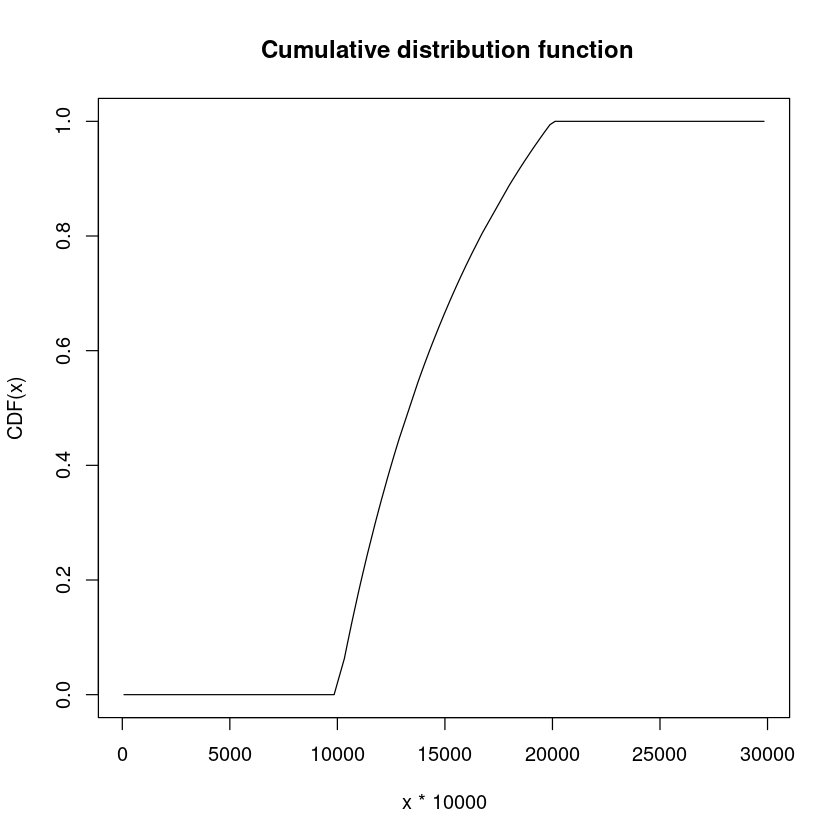

In [131]:
## The Cumulative Distribution Function (CDF) 

cdf_x <- function(x){
    if (x<=1){
        cu <-0
    }
    if (x>1 & x<2){
        cu <-integrate(pdf_x,1,x)$value  
    }
    if (x>=2){
        cu <-1
    }
    return(cu)
}

x<-sort(runif(150,0,3)) ## range x
 
y<-c()
for (i in 1:150){
    y[i] <- cdf_x(x[i]) ## cdf of our x range
}

plot(x*10000,y, type='l',ylab='CDF(x)',
    main = sprintf (" Cumulative distribution function"))

In [138]:
## The Quantile Function (the inverse CDF) (finding nuber with especial probability)

qf_x <- function(p){
    i_cdf <- inverse(cdf_x, lower = 1, upper = 2) ## CDF  is monotone increasing functions in the interval [1,2]
   return(i_cdf(p))
}

qf_x(0.8)

[1] 1.66667

In [139]:
## The Function to Generate Random variable having F(x) distribution

rf_x <- function(n){
    num <- c()
    p <- runif(n,0,1) ## generate random number between [0,1] (probability)
    for (i in 1:n){
         num[i] <- qf_x(p[i])  ## using qf functiom (inverse of CDF) to find the number
    }
   return (num)    
}

rf_x(10)

[1] 1.681778 1.707445 1.526819 1.572633 1.059056 1.731665 1.137704 1.700925
 [9] 1.493725 1.557554

#### b) determine the probability that tires will last less than 15000 km

In [142]:
cat('The probability that tires will last less than 15000 km is: ',
    cdf_x(15000/10000))## cdf is for x so x=15000/10000

The probability that tires will last less than 15000 km is:  0.6666667

#### c) sample 3000 random variables from the distribution and determine the mean value and the variance, using the expression$Var(X) = E[X^2] − E[X]^2$

In [152]:
sam <- (rf_x(3000))

M <- mean(sam)

E <- mean(sam**2)-(M**2) 

## we use the mean value as E[X] and mean of samples power 2 as E[X^2], becuase when we use the rf_x for generating 
## random samples from the distribution, it generate samples with the probability from CDF and after generating, 
## all samples have equal probability for calculating E[X] and E[X^2], so expexted value is the mean of values 
## and E[X^2] is the mean of X^2

cat('The mean value of the samples is: ',M,'\n\n' )
cat('The variance of the samples is: ',E)

The mean value of the samples is:  1.38246 

The variance of the samples is:  0.07766432

The mean value of the new samples is:  1.382461 

The variance of the new samples is:  0.07767166

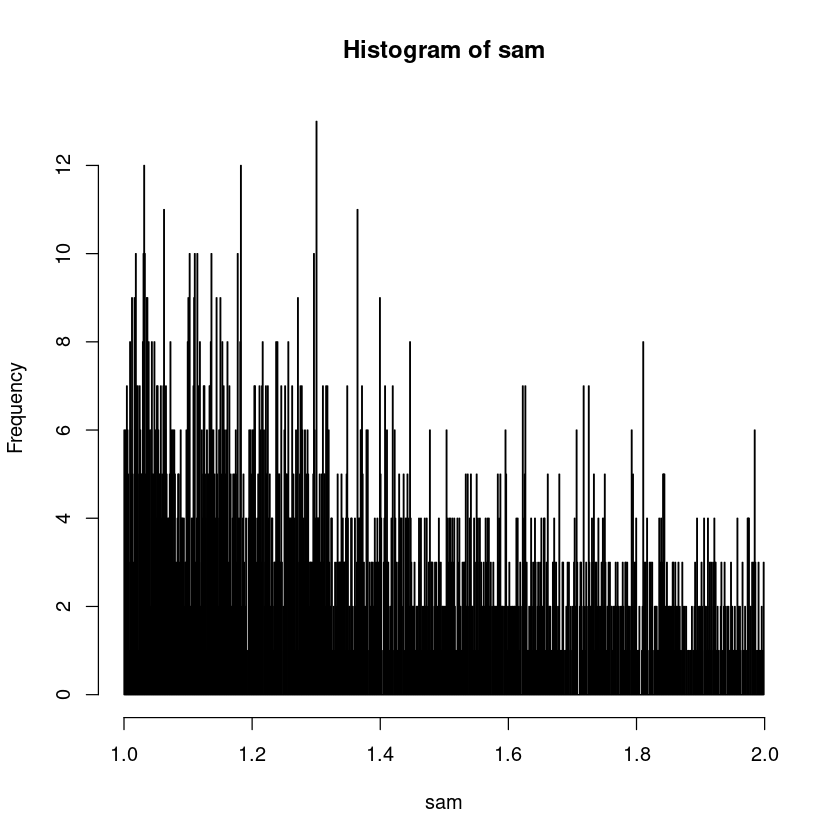

In [176]:
## we can show the above claim with ploting the histogeram of samples and find the frequency of each beens 
## as probability and center of beens as new samples after that use 𝑉𝑎𝑟(𝑋)=𝐸[𝑋^2]−𝐸[𝑋]^2

hist_sam <- hist(sam,breaks =1000)

new_sam <- c()
for (i in 1:999){
    new_sam[i] <- ((hist_sam$breaks[i+1]-hist_sam$breaks[i])/2)+hist_sam$breaks[i]
    ## center of beens as new samples   
}

prob <- (hist_sam$counts)/3000 ## probability = frequency of center of beens/3000


cat('The mean value of the new samples is: ',Expect(new_sam,prob),'\n\n' ) ## using Expect function ex-1
cat('The variance of the new samples is: ',Variance(new_sam,prob)) ## using Variance function ex-1


## we can see from the histogeram that they follow from the pdf_x 